In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import scipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-1.736970602504627, -154.83895310993),
 (83.68093008003711, 92.3929647798418),
 (73.41194288885086, 177.22266427291652),
 (-14.342888935667048, -84.82979949851165),
 (53.771688422927156, 82.29386843608171),
 (63.889910535106566, -39.461499273254134),
 (37.778795954955015, 8.221132020702584),
 (59.24833968305987, 16.375819254214576),
 (-44.64154362401979, -144.62361669831216),
 (-41.71239841486224, 0.8566477574415785),
 (9.86574301395072, -104.57922303564354),
 (49.67442831103753, 108.30088582349083),
 (-53.18711646189273, -10.58511502975037),
 (-0.8527399281946657, -116.43567191503226),
 (87.82718486504967, -121.48603715095624),
 (-44.24161240954746, -149.62063970760735),
 (22.084932438980047, 42.10528475723336),
 (81.38974059306241, -106.61732439925169),
 (-70.9942487278789, 130.82731224355774),
 (62.22108831912223, 105.27756423499358),
 (68.70887163650553, -126.44424783163612),
 (6.7422881479822365, -8.162463640975005),
 (71.89206699043083, -107.58458780604845),
 (-62.3008562818651

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
# import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a3403f62cded105762a7d79768a5a187


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counter.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | hualmay
Processing Record 5 of Set 1 | suzun
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | tabarqah
City not found. Skipping...
Processing Record 8 of Set 1 | eskilstuna
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | ixtapa
Processing Record 12 of Set 1 | krasnyy chikoy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | mecca
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | toulepleu
City not found. Skipping...
Processing R

Processing Record 38 of Set 4 | krasnoselkup
Processing Record 39 of Set 4 | ajdabiya
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | sohag
Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | kyren
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | raudeberg
Processing Record 47 of Set 4 | aloleng
Processing Record 48 of Set 4 | samfya
Processing Record 49 of Set 4 | mbaiki
Processing Record 50 of Set 4 | asau
Processing Record 1 of Set 5 | kiama
Processing Record 2 of Set 5 | gold coast
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | praia grande
Processing Record 5 of Set 5 | valera
Processing Record 6 of Set 5 | kieta
Processing Record 7 of Set 5 | maldonado
Processing Record 8 of Set 5 | zhigansk
Processing Record 9 of Set 5 | malartic
Processing Record 10 of Set 5 | tiznit
Processing Record 11 of Set 5 | bambanglipu

Processing Record 28 of Set 8 | hovd
Processing Record 29 of Set 8 | thinadhoo
Processing Record 30 of Set 8 | conil
Processing Record 31 of Set 8 | kabare
Processing Record 32 of Set 8 | aksu
Processing Record 33 of Set 8 | chanute
Processing Record 34 of Set 8 | omsukchan
Processing Record 35 of Set 8 | graaff-reinet
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | rorvik
Processing Record 38 of Set 8 | kayes
Processing Record 39 of Set 8 | gisborne
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | burkhala
City not found. Skipping...
Processing Record 42 of Set 8 | maiduguri
Processing Record 43 of Set 8 | yecuatla
Processing Record 44 of Set 8 | mani
Processing Record 45 of Set 8 | muros
Processing Record 46 of Set 8 | along
Processing Record 47 of Set 8 | zaterechnyy
Processing Record 48 of Set 8 | sakaiminato
Processing Record 49 of Set 8 | nome
Processing Record 50 of Set 8 | encruzilhada
Processing Record 1 of Set 9 | lorengau

City not found. Skipping...
Processing Record 20 of Set 12 | vao
Processing Record 21 of Set 12 | nishihara
Processing Record 22 of Set 12 | saint-augustin
Processing Record 23 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 24 of Set 12 | guarumal
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | atambua
Processing Record 27 of Set 12 | thaba-tseka
Processing Record 28 of Set 12 | vaitape
Processing Record 29 of Set 12 | grand gaube
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | palauig
Processing Record 32 of Set 12 | huilong
Processing Record 33 of Set 12 | marsabit
Processing Record 34 of Set 12 | paamiut
Processing Record 35 of Set 12 | biltine
Processing Record 36 of Set 12 | erenhot
Processing Record 37 of Set 12 | iisalmi
Processing Record 38 of Set 12 | bahia blanca
Processing Record 39 of Set 12 | tiruchchendur
Processing Record 40 of Set 12 | broken hill
Processing Record 41 of Set 12 | teya
Processing Rec

In [9]:
city_weather

{'coord': {'lon': 82.61, 'lat': 49.96},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 51.8,
  'feels_like': 50.58,
  'temp_min': 51.8,
  'temp_max': 51.8,
  'pressure': 1008,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 0},
 'clouds': {'all': 20},
 'dt': 1594596702,
 'sys': {'type': 1,
  'id': 8831,
  'country': 'KZ',
  'sunrise': 1594593305,
  'sunset': 1594650908},
 'timezone': 21600,
 'id': 1520316,
 'name': 'Oskemen',
 'cod': 200}

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,79.02,75,100,14.72,PF,2020-07-12 23:30:41
1,Talnakh,69.49,88.40,51.80,93,96,2.24,RU,2020-07-12 23:30:42
2,Leningradskiy,69.38,178.42,43.32,70,57,11.74,RU,2020-07-12 23:30:42
3,Hualmay,-11.10,-77.61,62.46,78,7,6.85,PE,2020-07-12 23:26:13
4,Suzun,53.78,82.31,62.55,96,100,7.85,RU,2020-07-12 23:30:42
5,Tasiilaq,65.61,-37.64,39.20,86,0,8.05,GL,2020-07-12 23:30:42
6,Eskilstuna,59.37,16.51,52.00,93,29,3.36,SE,2020-07-12 23:30:42
7,Mataura,-46.19,168.86,42.94,86,86,3.98,NZ,2020-07-12 23:30:42
8,Saldanha,-33.01,17.94,59.00,82,65,28.86,ZA,2020-07-12 23:30:43
9,Ixtapa,20.70,-105.20,84.20,83,90,3.36,MX,2020-07-12 23:30:43


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-07-12 23:30:41,-16.48,-151.75,79.02,75,100,14.72
1,Talnakh,RU,2020-07-12 23:30:42,69.49,88.40,51.80,93,96,2.24
2,Leningradskiy,RU,2020-07-12 23:30:42,69.38,178.42,43.32,70,57,11.74
3,Hualmay,PE,2020-07-12 23:26:13,-11.10,-77.61,62.46,78,7,6.85
4,Suzun,RU,2020-07-12 23:30:42,53.78,82.31,62.55,96,100,7.85
...,...,...,...,...,...,...,...,...,...
556,Puerto Escondido,MX,2020-07-12 23:30:30,15.85,-97.07,86.00,70,75,5.82
557,Port Hardy,CA,2020-07-12 23:31:42,50.70,-127.42,57.20,82,75,5.82
558,Vangaindrano,MG,2020-07-12 23:31:42,-23.35,47.60,65.44,91,38,6.55
559,Vuktyl,RU,2020-07-12 23:31:42,63.86,57.31,55.51,78,50,10.22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
#Get Today's date in seconds.
today = time.time()
today

1594596702.519353

In [18]:
today = time.strftime("%x")
today

'07/12/20'

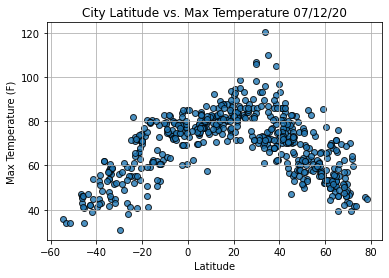

In [19]:
# build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

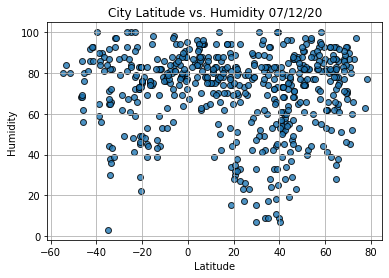

In [20]:
# build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

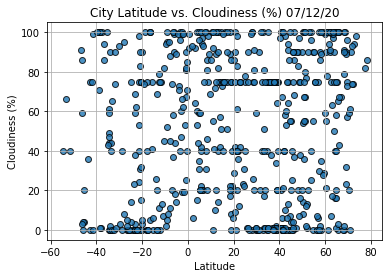

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

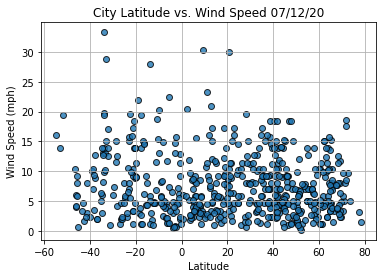

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2020-07-12 23:30:43
Lat                         69.45
Lng                       -133.04
Max Temp                     57.2
Humidity                       67
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

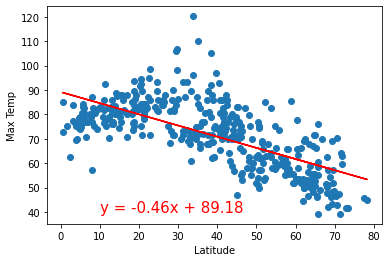

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

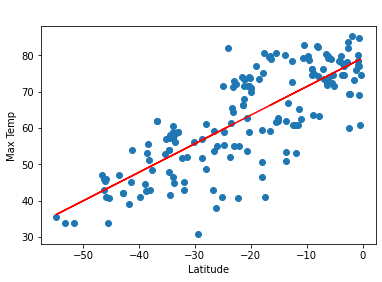

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(-50,90))

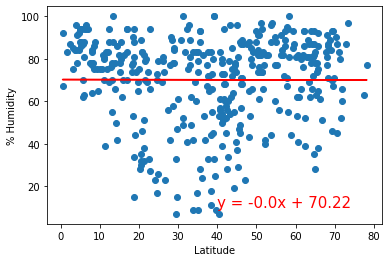

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

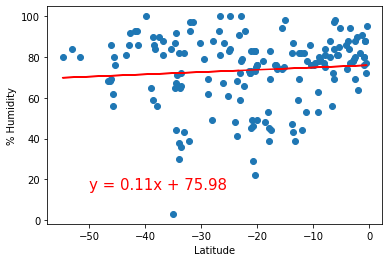

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

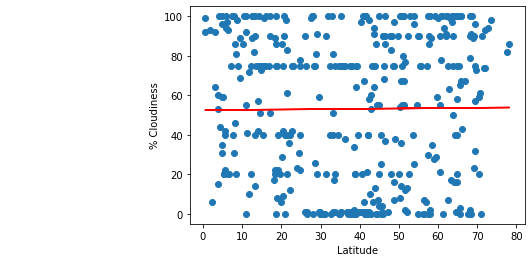

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,15))

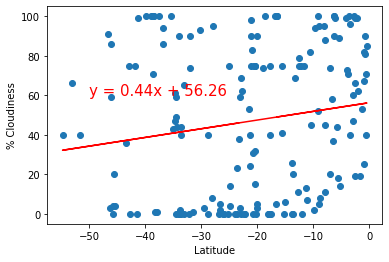

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

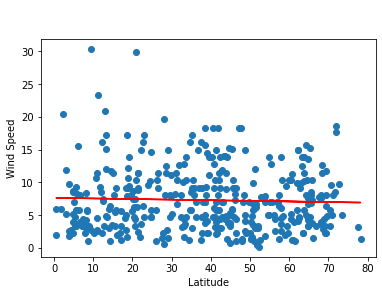

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

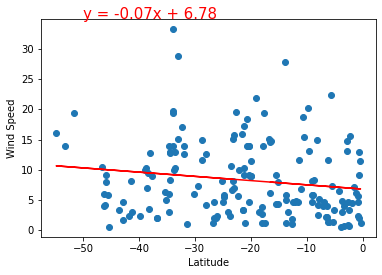

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))